In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import sys
import os

%run split_step_fourier.ipynb

# showing figures inline
%matplotlib inline
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

Text(0.5, 1.0, 'Impulse Responses')

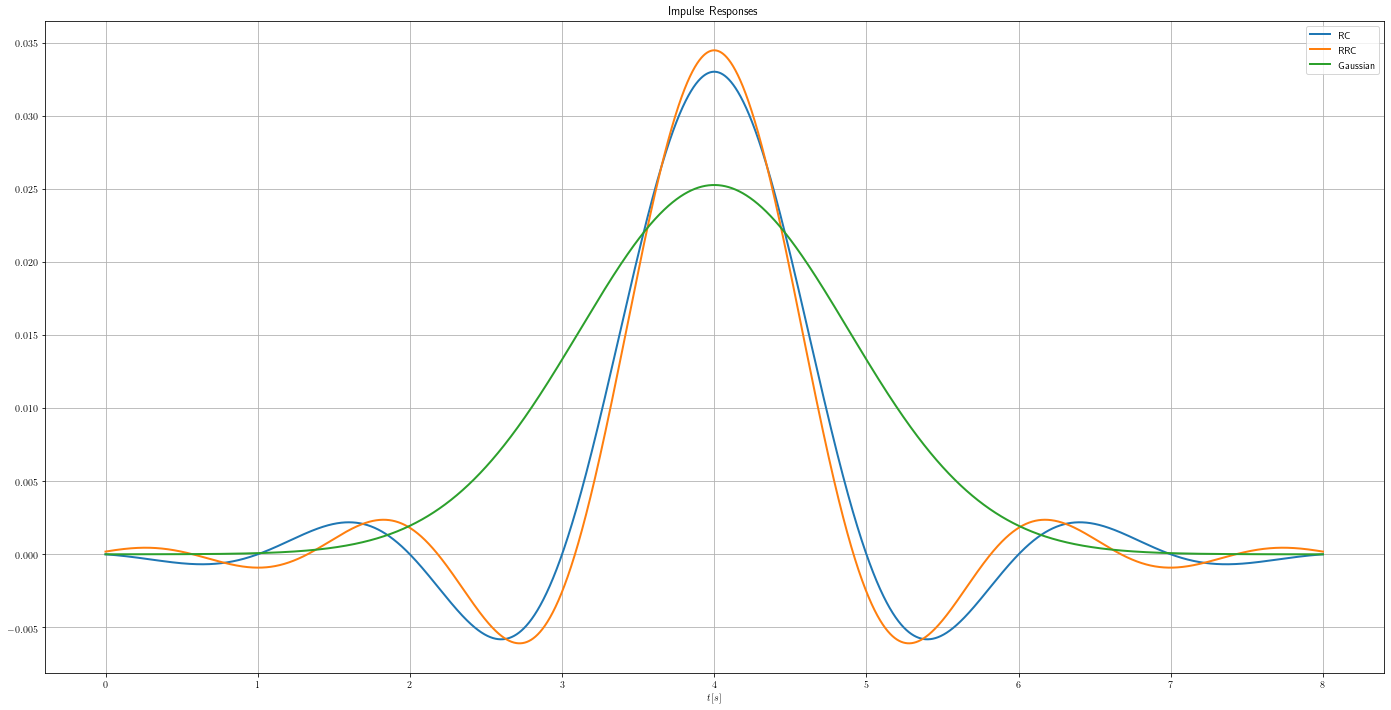

In [2]:
# parameters of the filters
f_symbol = 1.0  # symbol rate (Baud) (Symbols per second)
f_sample = 10  # sample rate (Hz) (Samples per second)
n_up = 100 # samples per symbol (>1 => oversampling)

r_rc = .33
r_rrc = .33
r_gaussian = 0.8

syms_per_filt = 4  # symbols per filter (plus minus in both directions)

t_sample_rc, rc = get_rc_ir( syms_per_filt, r_rc, f_symbol, f_sample, n_up )
t_sample_rrc, rrc = get_rrc_ir( syms_per_filt, r_rrc, f_symbol, f_sample, n_up )
t_sample_gaussian, gaussian = get_gaussian_ir( r_gaussian, f_symbol/2/syms_per_filt, f_sample, n_up )

matplotlib.rc('figure', figsize=(24, 12) )

plt.plot( np.arange(rc.size)*t_sample_rc, rc, linewidth=2.0, label='RC' )
plt.plot( np.arange(rrc.size)*t_sample_rrc, rrc, linewidth=2.0, label='RRC' )
plt.plot( np.arange(gaussian.size)*t_sample_gaussian, gaussian, linewidth=2.0, label='Gaussian' )

plt.grid( True )
plt.legend( loc='upper right' )
plt.xlabel('$t[s]$')
plt.title( 'Impulse Responses' )

Text(0.5, 1.0, 'Impulse Responses')

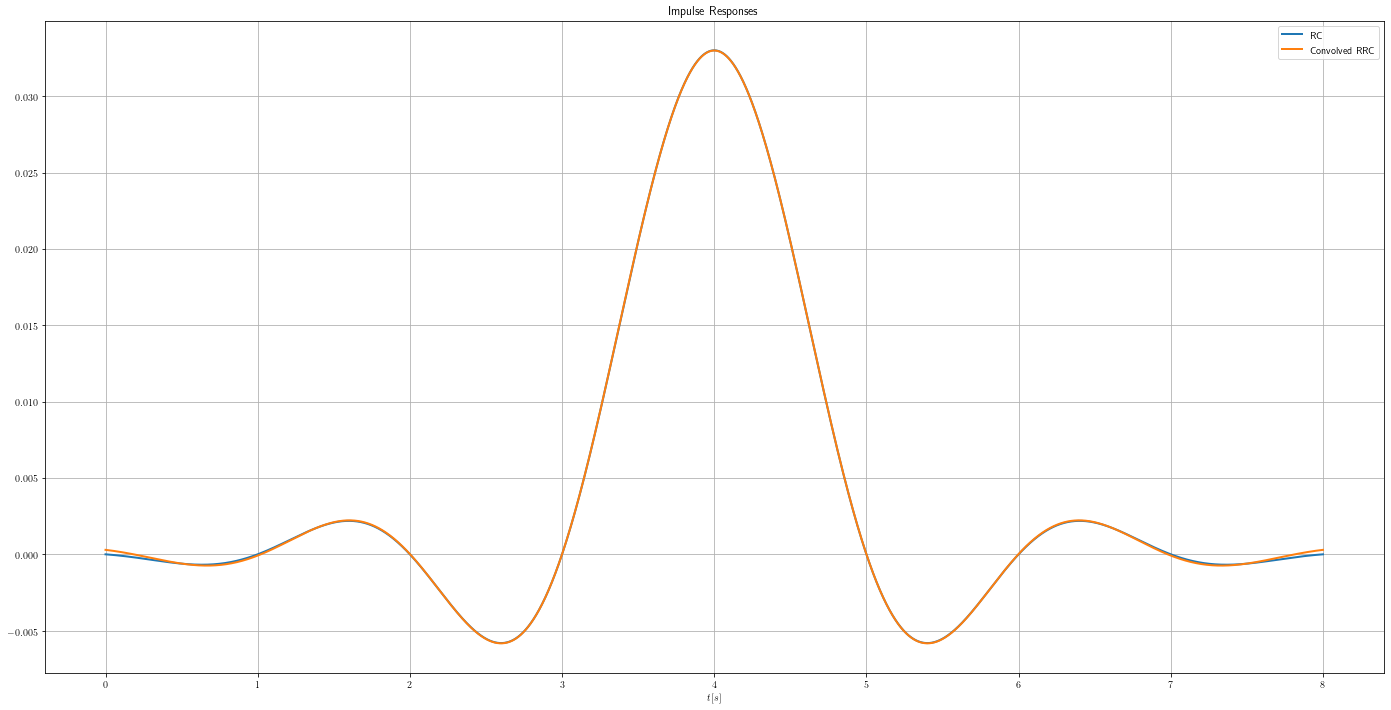

In [3]:
# Comparison of convolved rrc with rc

t_rc, rc = get_rc_ir( syms_per_filt, r_rc, f_symbol, f_sample, n_up )
t_rrc, rrc = get_rrc_ir( syms_per_filt, r_rrc, f_symbol, f_sample, n_up )

rrc_convolved = np.convolve(rrc, rrc, mode='same')
rrc_convolved /= np.linalg.norm(rrc_convolved)

matplotlib.rc('figure', figsize=(24, 12) )

plt.plot( np.arange(rc.size)*t_sample_rc, rc , linewidth=2.0, label='RC' )
plt.plot( np.arange(rrc_convolved.size)*t_sample_rrc, rrc_convolved, linewidth=2.0, label='Convolved RRC')

plt.grid( True )
plt.legend( loc='upper right' )
plt.xlabel('$t[s]$')
plt.title( 'Impulse Responses' )


Text(0.5, 1.0, 'Modulation Gaus')

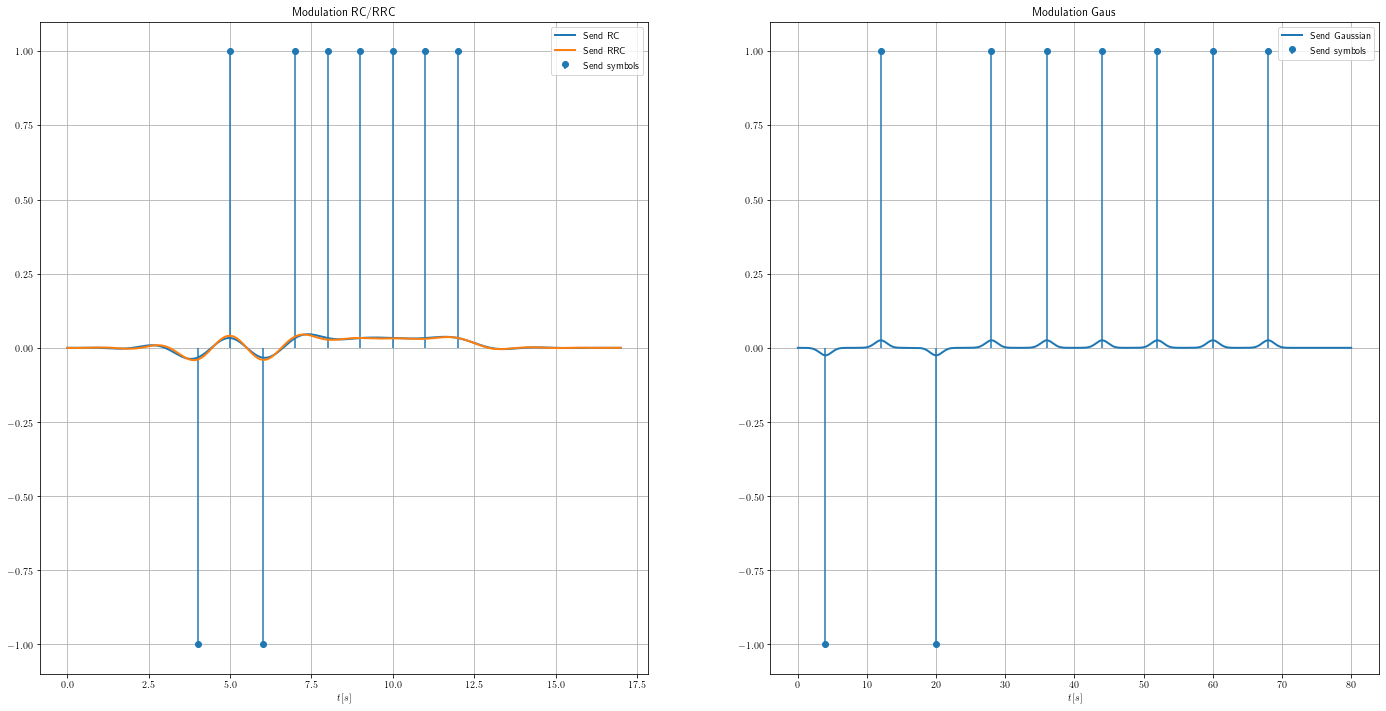

In [4]:
# modulation scheme and constellation points
M = 2
modulation = {'0': -1, '1': 1}

n_symbol = 4  # number of symbols

# Signalfolge generieren
send_bits = np.random.choice([symbol for symbol in modulation.keys()], size=n_symbol)

send_rc = generate_signal(modulation, send_bits, rc, syms_per_filt)
send_rrc = generate_signal(modulation, send_bits, rrc, syms_per_filt)
send_gaussian = generate_signal(modulation, send_bits, gaussian, 0)

matplotlib.rc('figure', figsize=(24, 12) )

plt.subplot(121)
plt.plot( np.arange(send_rc.size)*t_sample_rc, send_rc, linewidth=2.0, label='Send RC' )
plt.plot( np.arange(send_rrc.size)*t_sample_rrc, send_rrc, linewidth=2.0, label='Send RRC' )
plt.stem( np.arange(n_symbol/f_symbol, step=1/f_symbol)+syms_per_filt/f_symbol, [ modulation[str(symbol)] for symbol in send_bits ], label='Send symbols', use_line_collection=True, basefmt=' ')

plt.grid( True )
plt.ylim(-1.1, 1.1)
plt.xlabel('$t[s]$')
plt.legend( loc='upper right' )
plt.title( 'Modulation RC/RRC' )

plt.subplot(122)
plt.plot( np.arange(send_gaussian.size)*t_sample_gaussian, send_gaussian, linewidth=2.0, label='Send Gaussian' )
plt.stem( np.arange(8*n_symbol/f_symbol, step=8/f_symbol)+syms_per_filt/f_symbol, [ modulation[str(symbol)] for symbol in send_bits ], label='Send symbols', use_line_collection=True, basefmt=' ')

plt.grid( True )
plt.ylim(-1.1, 1.1)
plt.xlabel('$t[s]$')
plt.legend( loc='upper right' )
plt.title( 'Modulation Gaus' )


Text(0.5, 1.0, 'Impulse Responses')

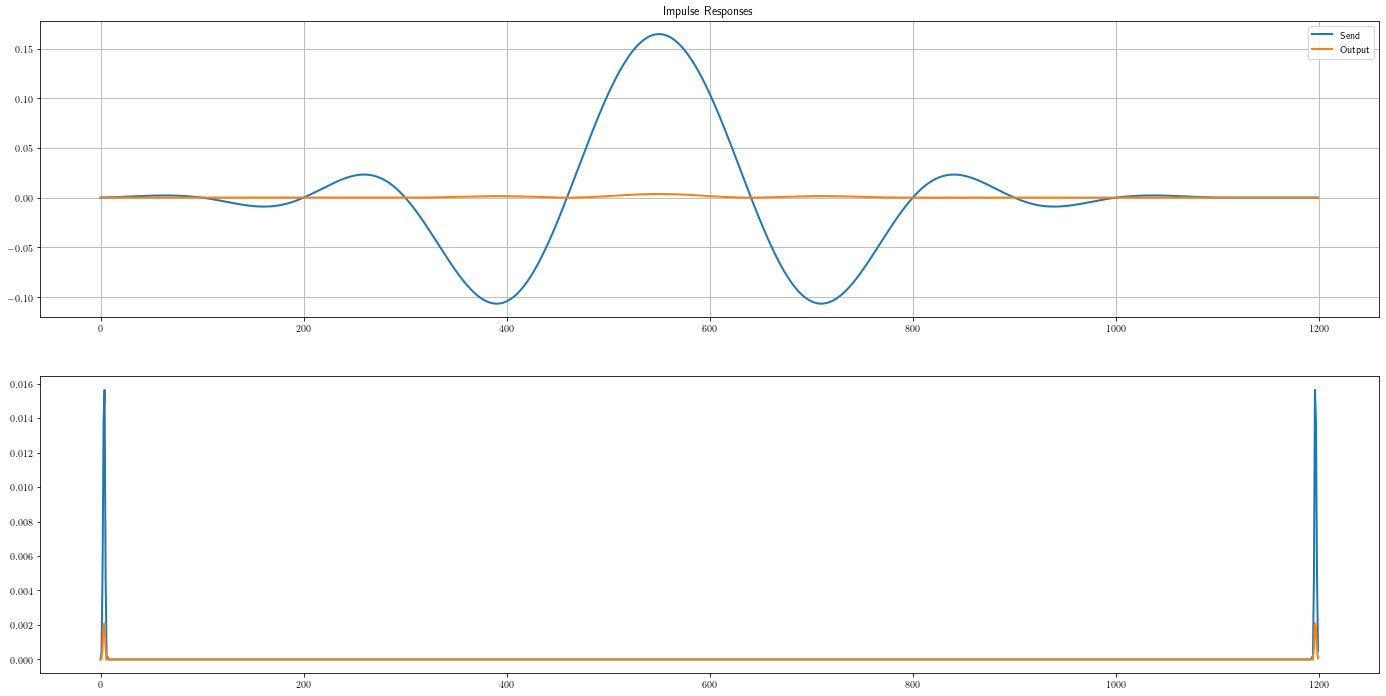

In [5]:
# Transmission

z_length = 5
nz = 2000
dz = z_length / nz

alpha=0.2  # Dämpfung (dB/km)
D = 17  # ps/nm/km
beta2 = -np.square(1550e-9) * ( D * 1e-6 ) / ( 2 * np.pi * 3e8)  # propagation constant
gamma = 0.5e-6 # ps/km

output = split_step_fourier.splitstepfourier(send_rc, t_sample_gaussian, dz, nz, alpha, beta2, gamma)

matplotlib.rc('figure', figsize=(24, 12) )

#plt.subplot(211)
plt.plot( np.square(abs(send_rc)), linewidth=2.0, label='Send' )
plt.plot( np.square(abs(output)), linewidth=2.0, label='Output' )

plt.grid( True )
plt.legend( loc='upper right' )
plt.title( 'Impulse Responses' )

#plt.subplot(212)
#plt.plot( np.square(abs(t_sample_gaussian*np.fft.fft(send_gaussian)/np.sqrt(2*np.pi))), linewidth=2.0, label='Send' )
#plt.plot( np.square(abs(t_sample_gaussian*np.fft.fft(output)/np.sqrt(2*np.pi))), linewidth=2.0, label='Output')